In [1]:
import yfinance as yf
msft = yf.Ticker("MSFT")

In [2]:
# period: periode visée jusqu'à la date d'aujourd'hui (1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max)
df_historique_msft = msft.history(period="max") # Chercher l'historique des prix de l'action
df_historique_msft.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13,0.061613,0.064903,0.056110,0.061613,1031788800,0.0,0.0
1986-03-14,0.063764,0.064903,0.061613,0.063764,308160000,0.0,0.0
1986-03-17,0.063761,0.065472,0.063761,0.064903,133171200,0.0,0.0
1986-03-18,0.063258,0.065472,0.062689,0.063258,66470400,0.0,0.0
1986-03-19,0.063212,0.063764,0.061613,0.062119,47894400,0.0,0.0


In [3]:
df_historique_msft.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-12-06,323.950012,327.450012,319.230011,326.190002,30032556,0.0,0.0
2021-12-07,331.640015,335.799988,330.100006,334.920013,31021936,0.0,0.0
2021-12-08,335.309998,335.500000,330.799988,334.970001,24760988,0.0,0.0
2021-12-09,334.410004,336.489014,332.119995,333.100006,21561374,0.0,0.0
2021-12-10,334.980011,343.000000,334.790009,342.540009,36582109,0.0,0.0


In [4]:
df_historique_msft.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,9012.000000,9012.000000,9012.000000,9012.000000,9.012000e+03,9012.000000,9012.000000
mean,34.187107,34.534565,33.835448,34.200676,5.854638e+07,0.002433,0.001886
std,55.259324,55.766367,54.750647,55.297190,3.887327e+07,0.041859,0.060026
min,0.057165,0.058324,0.056110,0.057185,0.000000e+00,0.000000,0.000000
25%,2.505403,2.537939,2.493613,2.511976,3.454292e+07,0.000000,0.000000
50%,18.870959,19.081126,18.642922,18.876852,5.181120e+07,0.000000,0.000000
75%,28.696682,29.066437,28.332180,28.743842,7.212240e+07,0.000000,0.000000
max,344.619995,349.670013,342.200012,343.109985,1.031789e+09,3.000000,2.000000


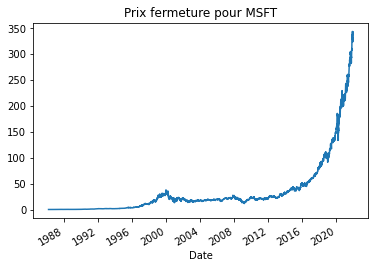

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
# Afficher le graphique des prix de fermeture
df_historique_msft['Close'].plot()
plt.title("Prix fermeture pour MSFT")
plt.show()

<AxesSubplot:xlabel='Date'>

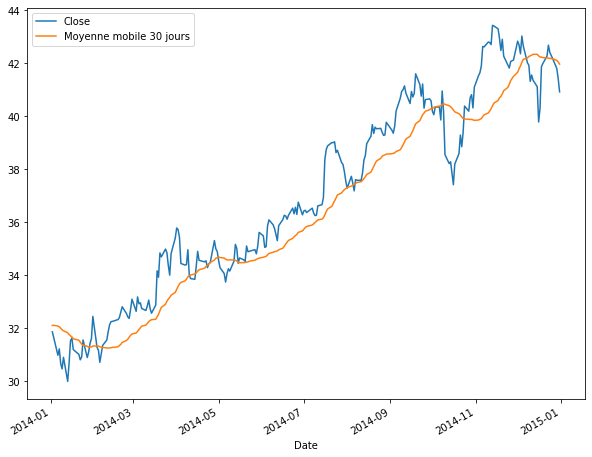

In [44]:
# Moyenne mobile 30 jours
df_historique_msft['Moyenne mobile 30 jours'] = df_historique_msft['Close'].rolling(window=30).mean()

# Graphique 
df_historique_msft['2014-01-01': '2015-01-01'][['Close', 'Moyenne mobile 30 jours']].plot(figsize=(10,8))

In [46]:
df_historique_msft['Log retours Close'] = np.log(df_historique_msft['Close']/df_historique_msft['Close'].shift(1))

<AxesSubplot:xlabel='Date'>

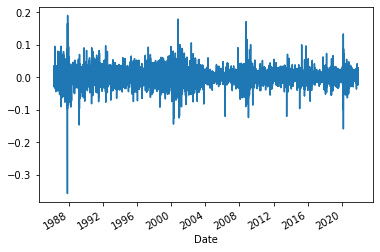

In [48]:
df_historique_msft['Log retours Close'].plot()

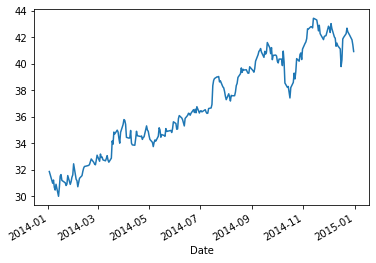

In [6]:
df_historique_msft_2014_close = df_historique_msft['2014-01-01': '2015-01-01']['Close']
df_historique_msft_2014_close.plot()
# rolling() retourne un objet Rolling qui permet des opérations d'agrégation sur une fenêtre de données
# par défaut chacun des éléments est pondéré également
fenetre_10=df_historique_msft['2014-01-01': '2015-01-01']['Close'].rolling(window = 10)

<AxesSubplot:xlabel='Date'>

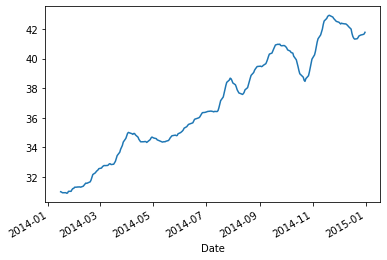

In [7]:
# Prend la moyenne mobile de 10 valeurs à la fois
fenetre_10.mean().plot()

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

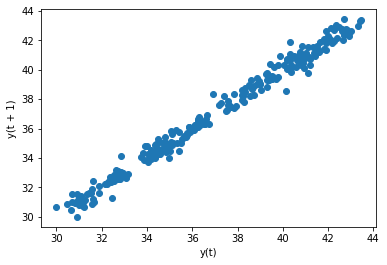

In [8]:
from pandas.plotting import lag_plot
plt.figure()
# Affiche Yt+lag vs Yt
# Si lag=1 affiche serie[:-1] vs. serie[1:]
lag_plot(df_historique_msft_2014_close,lag=1)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

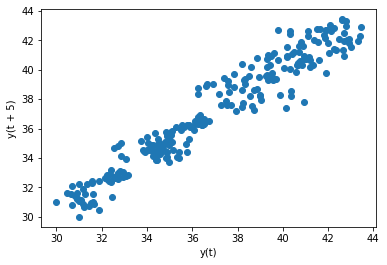

In [9]:
lag_plot(df_historique_msft_2014_close, lag=5)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

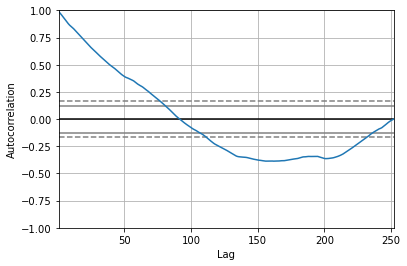

In [10]:
from pandas.plotting import autocorrelation_plot
plt.figure()
# La ligne pleine indique l'intervalle de confiance à 95%
# La ligne pointillée indique l'intervalle de confiance à 99%
autocorrelation_plot(df_historique_msft_2014_close)

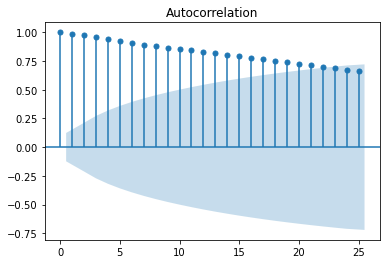

In [11]:
# plot_acf() de statsmodel produit un graphique similaire
# le cône est un intervalle de confiance à 95%
from statsmodels.graphics.tsaplots import plot_acf
# Plot the acf function on the ts_data_load set
plot_acf(df_historique_msft_2014_close)
plt.show()

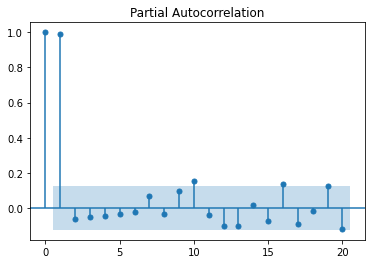

In [12]:
from statsmodels.graphics.tsaplots import plot_pacf
# Autocorrélation partielle : corrélation après avoir enlevé l'effet des données plus récentes par rapport à cible
plot_pacf(df_historique_msft_2014_close, lags=20)
plt.show()

In [13]:
import os
import sys
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
def tsplot(y, lags=None, figsize=(10, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        #mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))
        
        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')        
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)
        plt.tight_layout()
    return 

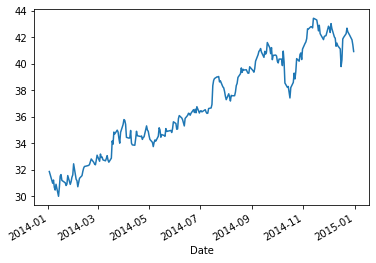

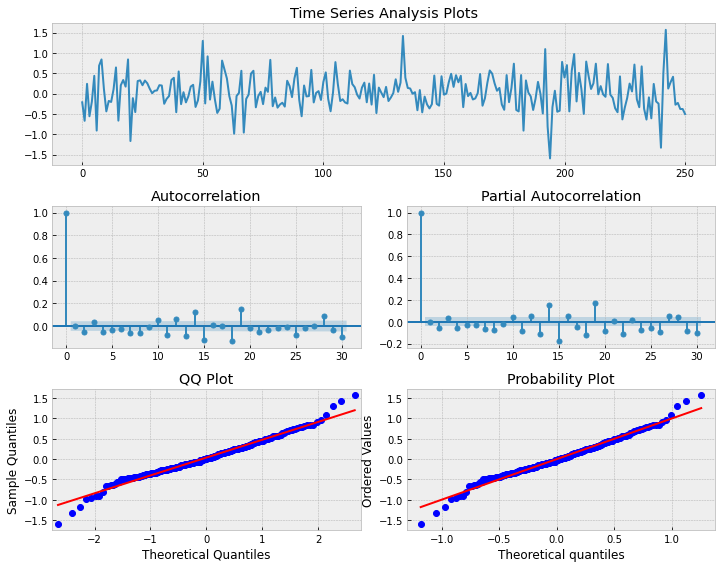

In [14]:
df_historique_msft_2014_close.plot()
# Première différence proche stationnaire
tsplot(np.diff(df_historique_msft_2014_close), lags=30)

In [15]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import lag_plot
from sklearn.metrics import mean_squared_error

In [16]:
X=df_historique_msft_2014_close.values
train, test = X[1:round(len(X)*0.8)], X[round(len(X)*0.8):]

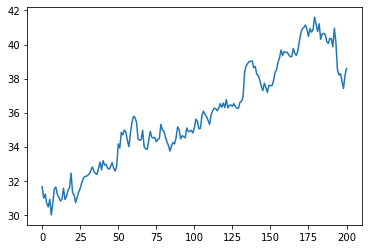

In [17]:
plt.plot(train)

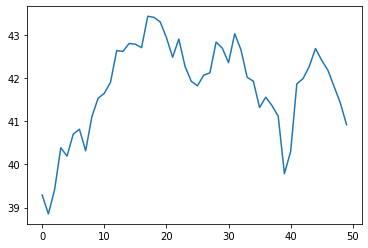

In [18]:
plt.plot(test)

In [19]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# train autoregression
model = AutoReg(train, lags=1)
model_fit = model.fit()
print(model_fit.summary())
print('Coefficients: %s' % model_fit.params)

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                  201
Model:                     AutoReg(1)   Log Likelihood                -109.061
Method:               Conditional MLE   S.D. of innovations              0.417
Date:                Sat, 11 Dec 2021   AIC                             -1.717
Time:                        13:08:29   BIC                             -1.668
Sample:                             1   HQIC                            -1.697
                                  201                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.4625      0.348      1.327      0.184      -0.220       1.145
y.L1           0.9880      0.010    101.765      0.000       0.969       1.007
                                    Roots           

C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


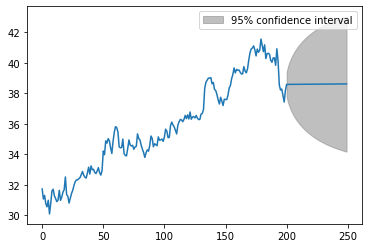

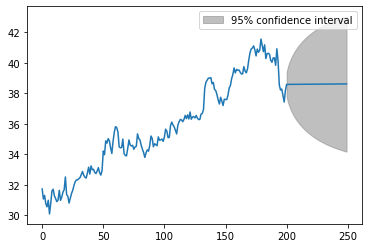

In [20]:
model_fit.plot_predict(0,250,dynamic=False)

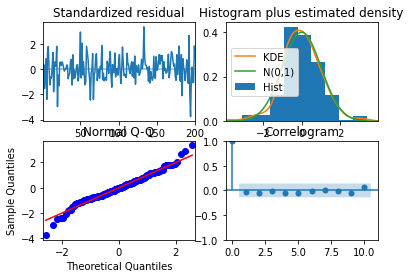

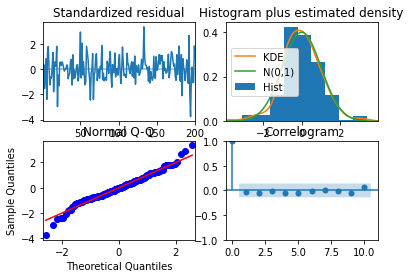

In [21]:
model_fit.plot_diagnostics()

In [22]:
predictions_MSFT_2014 = model_fit.predict(start=0, end=len(train)+len(test)-1,dynamic=True)

In [23]:
len(predictions_MSFT_2014)

250

In [24]:
len(train)

201

In [25]:
len(np.concatenate((train,test)))

251

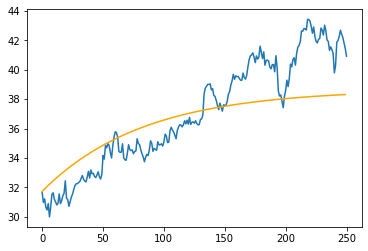

In [26]:
plt.plot(np.concatenate((train,test)))
plt.plot(predictions_MSFT_2014, color='orange')
plt.show()

In [27]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train, order=(4,1,4))
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)

C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


Coefficients: [ 1.06418805 -1.12813751  1.00034662 -0.21479837 -1.13640028  1.18522929
 -1.02208528  0.1987223   0.17253102]


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [28]:
preds_MA1_MSFT_2014 = model_fit.predict(start=0, end=len(train)+len(test)-1,dynamic=True)

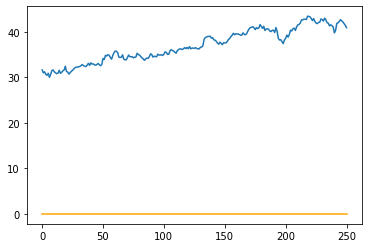

In [29]:
plt.plot(np.concatenate((train,test)))
plt.plot(preds_MA1_MSFT_2014, color='orange')
plt.show()

Coefficients: [35.42239611  0.9914755   0.17609238]


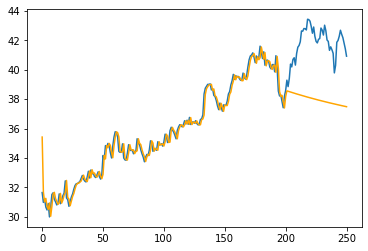

In [30]:
model_fit = ARIMA(train, order=(1,0,0)).fit()
print('Coefficients: %s' % model_fit.params)
preds_ARIMA_MSFT_2014 = model_fit.predict(start=0, end=len(train)+len(test)-1,dynamic=False)
plt.plot(np.concatenate((train,test)))

plt.plot(preds_ARIMA_MSFT_2014, color='orange')
plt.show()

0 0 0
1021.2636665484033 1021.2636665484033 True
(0, 0, 0)
0 0 1
788.1743703412786 788.1743703412786 True
(0, 0, 1)
0 0 2
621.4141859502678 621.4141859502678 True
(0, 0, 2)
0 0 3
525.5253489997053 525.5253489997053 True
(0, 0, 3)
0 0 4


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


464.86167302538865 464.86167302538865 True
(0, 0, 4)
0 1 0
223.0002075718628 223.0002075718628 True
(0, 1, 0)
0 1 1
224.8816456439425 224.8816456439425 False
0 1 2
226.42930482662382 226.42930482662382 False
0 1 3
228.3795981674432 228.3795981674432 False
0 1 4
229.87100330949755 229.87100330949755 False
1 0 0
231.40811127386968 231.40811127386968 False
1 0 1
233.33526335596537 233.33526335596537 False
1 0 2
234.96452437179937 234.96452437179937 False
1 0 3
236.94347400004054 236.94347400004054 False
1 0 4
238.5373937970985 238.5373937970985 False
1 1 0
224.89230002833747 224.89230002833747 False
1 1 1
225.9519994557548 225.9519994557548 False
1 1 2
227.82480893687529 227.82480893687529 False
1 1 3
229.82475538626431 229.82475538626431 False
1 1 4
231.49173279582493 231.49173279582493 False
2 0 0
233.3412890469744 233.3412890469744 False
2 0 1


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


235.0670976530841 235.0670976530841 False
2 0 2
236.94921878619698 236.94921878619698 False
2 0 3
238.596509359581 238.596509359581 False
2 0 4


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


240.27199043309673 240.27199043309673 False
2 1 0
226.48771146025265 226.48771146025265 False
2 1 1
227.82425567417545 227.82425567417545 False
2 1 2
229.7936756505799 229.7936756505799 False
2 1 3
231.79302375238268 231.79302375238268 False
2 1 4
233.4424211604658 233.4424211604658 False
3 0 0
235.00443644556012 235.00443644556012 False
3 0 1


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


236.59630624292788 236.59630624292788 False
3 0 2


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


237.82554692971436 237.82554692971436 False
3 0 3


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


235.66063618345203 235.66063618345203 False
3 0 4


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


242.17527731461547 242.17527731461547 False
3 1 0
228.46608010000722 228.46608010000722 False
3 1 1
229.82302975976364 229.82302975976364 False
3 1 2
231.79289743619086 231.79289743619086 False
3 1 3


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


232.0997917996931 232.0997917996931 False
3 1 4


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


232.36026293833686 232.36026293833686 False
4 0 0
236.99752297260926 236.99752297260926 False
4 0 1
239.0009497956919 239.0009497956919 False
4 0 2


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


241.166238054275 241.166238054275 False
4 0 3


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


238.27941416497669 238.27941416497669 False
4 0 4


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


241.5134375417221 241.5134375417221 False
4 1 0
229.9683378987139 229.9683378987139 False
4 1 1
231.4866140471794 231.4866140471794 False
4 1 2
233.4600275330806 233.4600275330806 False
4 1 3


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


233.73471114827592 233.73471114827592 False
4 1 4


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


236.3474008154009 236.3474008154009 False
aic: 223.00021 | order: (0, 1, 0)


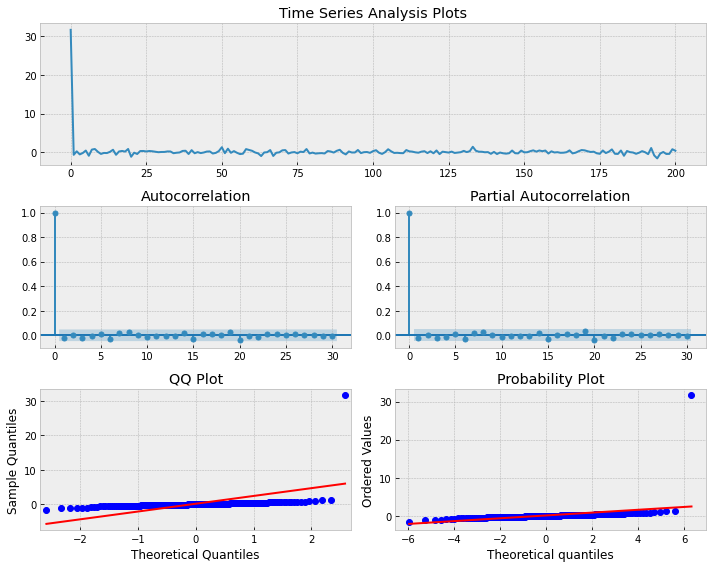

In [31]:
# Fit ARIMA(p, d, q) model to SPY Returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3,4]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            print(i,d,j)
            tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
            tmp_aic = tmp_mdl.aic
            print(tmp_aic,tmp_mdl.aic,tmp_aic < best_aic)
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, d, j)
                print(best_order)
                best_mdl = tmp_mdl

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
# aic: -11518.22902 | order: (4, 0, 4)

# ARIMA model resid plot
tsplot(best_mdl.resid, lags=30)

In [34]:
# Select best lag order for MSFT returns

max_lag = 30
mdl = smt.AR(train).fit(maxlag=max_lag, ic='aic', trend='nc')
est_order = smt.AR(train).select_order(
    maxlag=max_lag, ic='aic', trend='nc')

print('best estimated lag order = {}'.format(est_order))

# best estimated lag order = 23

C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hes

best estimated lag order = 1


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


In [38]:
lrets = np.log(train[1:]/train[:-1])

In [39]:
lrets

array([-0.02135922,  0.00772004, -0.01801326, -0.00645306,  0.01425224,
       -0.02985297,  0.02261253,  0.02702113,  0.00353011, -0.01392106,
       -0.00578911, -0.00665743,  0.00347289,  0.02058804, -0.02128172,
        0.00663913,  0.0106955 ,  0.00544055,  0.0262397 , -0.03660263,
       -0.00356973, -0.01468812,  0.01000024,  0.0104481 ,  0.00654326,
        0.01013847,  0.00790463,  0.00372903,  0.00026552,  0.00214012,
        0.00240269,  0.00637795,  0.00607411, -0.007665  , -0.00398784,
       -0.00186585,  0.01035428,  0.01181601, -0.0139317 ,  0.01653813,
       -0.00784138,  0.00104953, -0.0065746 , -0.00211322,  0.00527429,
        0.00655369, -0.00997891, -0.00502699,  0.00924084,  0.03866504,
       -0.00710533,  0.02663511, -0.00422437,  0.00843021, -0.0039581 ,
       -0.01372788, -0.01086534,  0.02360136,  0.01697635,  0.01043584,
       -0.00169188, -0.00825599, -0.02819197, -0.00175704,  0.00050234,
        0.01619175, -0.02781076, -0.00384388, -0.00074017,  0.01

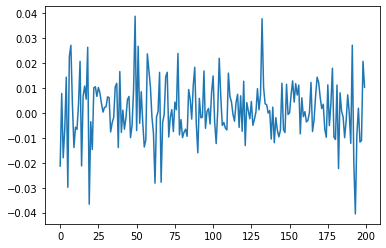

In [40]:
plt.plot(lrets)

In [49]:
X=df_historique_msft['Log retours Close'].values
train, test = X[1:round(len(X)*0.8)], X[round(len(X)*0.8):]

In [50]:
len(train)

7209

0 0 0
-34369.589069851805 -34369.589069851805 True
(0, 0, 0)
0 0 1


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34368.26375583613 -34368.26375583613 False
0 0 2


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34389.12521288727 -34389.12521288727 True
(0, 0, 2)
0 0 3
-34389.94502186711 -34389.94502186711 True
(0, 0, 3)
0 0 4
-34391.39774200176 -34391.39774200176 True
(0, 0, 4)
0 1 0
-29437.852063147187 -29437.852063147187 False
0 1 1
-34358.08680317853 -34358.08680317853 False
0 1 2


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34356.67708924251 -34356.67708924251 False
0 1 3


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34378.232778464204 -34378.232778464204 False
0 1 4
-34376.75989634225 -34376.75989634225 False
1 0 0
-34368.20620983736 -34368.20620983736 False
1 0 1
-34365.59926735599 -34365.59926735599 False
1 0 2


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34391.82120854574 -34391.82120854574 True
(1, 0, 2)
1 0 3
-34389.6686893555 -34389.6686893555 False
1 0 4
-34389.49747267649 -34389.49747267649 False
1 1 0
-31213.023485499856 -31213.023485499856 False
1 1 1
-34356.61327555233 -34356.61327555233 False
1 1 2
-34354.20238294916 -34354.20238294916 False
1 1 3
-34352.68205612896 -34352.68205612896 False
1 1 4
-34373.967848816246 -34373.967848816246 False
2 0 0
-34388.269159461895 -34388.269159461895 False
2 0 1
-34391.04097025086 -34391.04097025086 False
2 0 2
-34389.49372517103 -34389.49372517103 False
2 0 3
-34387.86330125133 -34387.86330125133 False
2 0 4
-34389.072883514775 -34389.072883514775 False
2 1 0
-32118.952015069972 -32118.952015069972 False
2 1 1


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34376.76042308136 -34376.76042308136 False
2 1 2
-34352.62344483429 -34352.62344483429 False
2 1 3
-34358.8125086768 -34358.8125086768 False
2 1 4


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34348.50608958616 -34348.50608958616 False
3 0 0
-34388.80635915427 -34388.80635915427 False
3 0 1
-34386.776015712865 -34386.776015712865 False
3 0 2
-34386.65302656776 -34386.65302656776 False
3 0 3
-34387.36847546163 -34387.36847546163 False
3 0 4
-34387.083253821664 -34387.083253821664 False
3 1 0


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-32581.56805072037 -32581.56805072037 False
3 1 1


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34376.3938809841 -34376.3938809841 False
3 1 2


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34365.80044177479 -34365.80044177479 False
3 1 3
-34357.01629907464 -34357.01629907464 False
3 1 4


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34337.95171565318 -34337.95171565318 False
4 0 0
-34392.28268148679 -34392.28268148679 True
(4, 0, 0)
4 0 1
-34390.26939886077 -34390.26939886077 False
4 0 2
-34391.61754571309 -34391.61754571309 False
4 0 3
-34387.514457585254 -34387.514457585254 False
4 0 4
-34388.35543862855 -34388.35543862855 False
4 1 0
-32921.491341434026 -32921.491341434026 False
4 1 1


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34380.163158262425 -34380.163158262425 False
4 1 2


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34350.07370607898 -34350.07370607898 False
4 1 3
-34369.67935547685 -34369.67935547685 False
4 1 4


C:\Users\vango\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


-34307.4978772911 -34307.4978772911 False
aic: -34392.28268 | order: (4, 0, 0)


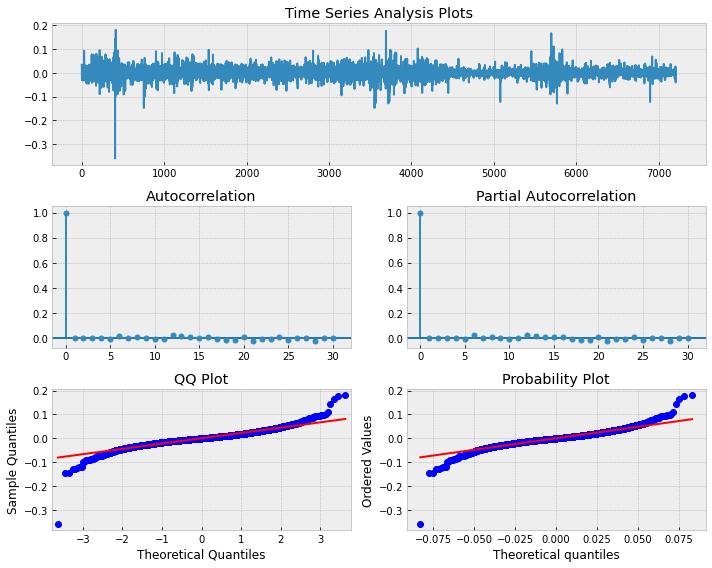

In [51]:
# Fit ARIMA(p, d, q) model to SPY Returns
# pick best order and final model based on aic

best_aic = np.inf 
best_order = None
best_mdl = None

pq_rng = range(5) # [0,1,2,3,4]
d_rng = range(2) # [0,1]
for i in pq_rng:
    for d in d_rng:
        for j in pq_rng:
            print(i,d,j)
            tmp_mdl = ARIMA(train, order=(i,d,j)).fit()
            tmp_aic = tmp_mdl.aic
            print(tmp_aic,tmp_mdl.aic,tmp_aic < best_aic)
            if tmp_aic < best_aic:
                best_aic = tmp_aic
                best_order = (i, d, j)
                print(best_order)
                best_mdl = tmp_mdl

print('aic: {:6.5f} | order: {}'.format(best_aic, best_order))
# aic: -11518.22902 | order: (4, 0, 4)

# ARIMA model resid plot
tsplot(best_mdl.resid, lags=30)

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tools.eval_measures import rmse
import seaborn as sns
import statsmodels.api as sm
import itertools
from statsmodels.tsa.arima_model import ARIMA, ARMA
import warnings
warnings.filterwarnings("ignore")

In [54]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))

In [59]:
df=df_historique_msft['Close']

warnings.filterwarnings("ignore")
aic= []
parameters = []
for param in pdq:
  #for param in pdq:
      try:
          mod = sm.tsa.statespace.SARIMAX(df,order=param,enforce_stationarity=True, enforce_invertibility=True)
          results = mod.fit()
          # save results in lists
          aic.append(results.aic)
          parameters.append(param)
          #seasonal_param.append(param_seasonal)
          print('ARIMA{} - AIC:{}'.format(param, results.aic))
      except:
          continue
# find lowest aic          
index_min = min(range(len(aic)), key=aic.__getitem__)           

print('The optimal model is: ARIMA{} -AIC{}'.format(parameters[index_min], aic[index_min]))


ARIMA(0, 0, 0) - AIC:100820.63828449887
ARIMA(0, 0, 1) - AIC:88506.30618018567
ARIMA(0, 0, 2) - AIC:77859.33387808363
ARIMA(0, 1, 0) - AIC:27386.851173420422
ARIMA(0, 1, 1) - AIC:27079.612367781476
ARIMA(0, 1, 2) - AIC:27041.955668111703
ARIMA(0, 2, 0) - AIC:35176.99465977651
ARIMA(0, 2, 1) - AIC:27350.92277024111
ARIMA(0, 2, 2) - AIC:27010.56107765666
ARIMA(1, 0, 0) - AIC:27402.580563655003
ARIMA(1, 0, 1) - AIC:27095.3588183917
ARIMA(1, 0, 2) - AIC:27057.696322086947
ARIMA(1, 1, 0) - AIC:27049.956336517585
ARIMA(1, 1, 1) - AIC:27046.163992005506
ARIMA(1, 1, 2) - AIC:27043.807594618196
ARIMA(1, 2, 0) - AIC:31047.67744702208
ARIMA(1, 2, 1) - AIC:26984.627053343138
ARIMA(1, 2, 2) - AIC:26983.986756571634
ARIMA(2, 0, 0) - AIC:27065.71604557073
ARIMA(2, 0, 1) - AIC:27399.10014692841
ARIMA(2, 0, 2) - AIC:27081.859031731485
ARIMA(2, 1, 0) - AIC:27044.80955007417
ARIMA(2, 1, 1) - AIC:27047.024196432772
ARIMA(2, 1, 2) - AIC:26880.47090293391
ARIMA(2, 2, 0) - AIC:29710.575575822484
ARIMA(2, 2, 

In [60]:
model = ARIMA(df, order=parameters[index_min])
model_fit = model.fit(disp=0) 
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 9011
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -13428.888
Method:                       css-mle   S.D. of innovations              1.074
Date:                Sat, 11 Dec 2021   AIC                          26869.775
Time:                        17:19:14   BIC                          26912.412
Sample:                             1   HQIC                         26884.283
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0379      0.011      3.565      0.000       0.017       0.059
ar.L1.D.Close    -1.7461      0.014   -123.546      0.000      -1.774      -1.718
ar.L2.D.Close    -0.8889      0.013    -

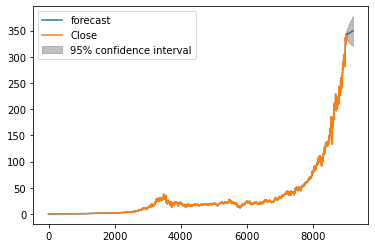

In [62]:
model_fit.plot_predict(start=2, end=len(df)+200)
plt.show()

ARIMA(0, 0, 0) - AIC:2538.8100514496814
ARIMA(0, 0, 1) - AIC:2198.7876881408674
ARIMA(0, 0, 2) - AIC:1873.9247439416836
ARIMA(0, 1, 0) - AIC:302.234074492413
ARIMA(0, 1, 1) - AIC:304.22370693433425
ARIMA(0, 1, 2) - AIC:305.66760319119123
ARIMA(0, 2, 0) - AIC:473.01304083335134
ARIMA(0, 2, 1) - AIC:307.8748702840462
ARIMA(0, 2, 2) - AIC:309.8737216750761
ARIMA(1, 0, 0) - AIC:314.267227300061
ARIMA(1, 0, 1) - AIC:316.2566705551038
ARIMA(1, 0, 2) - AIC:317.7016567980702
ARIMA(1, 1, 0) - AIC:304.22462348930446
ARIMA(1, 1, 1) - AIC:305.69069878947073
ARIMA(1, 1, 2) - AIC:307.1444631157416
ARIMA(1, 2, 0) - AIC:410.6512558728278
ARIMA(1, 2, 1) - AIC:309.87303060866117
ARIMA(1, 2, 2) - AIC:311.8587735986903
ARIMA(2, 0, 0) - AIC:316.2576029789486
ARIMA(2, 0, 1) - AIC:317.6038410046764
ARIMA(2, 0, 2) - AIC:319.70475663829836
ARIMA(2, 1, 0) - AIC:305.73715923059325
ARIMA(2, 1, 1) - AIC:308.21465718001014
ARIMA(2, 1, 2) - AIC:295.78540095441633
ARIMA(2, 2, 0) - AIC:373.4574675386723
ARIMA(2, 2, 1)

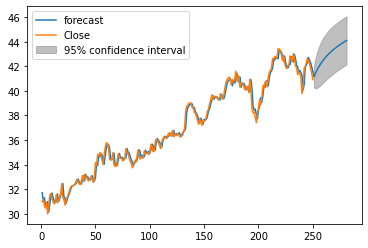

In [63]:
# Define the p, d and q parameters to take any value between 0 and 3
p = d = q = range(0, 3)
# Generate all different combinations of p, q and q
pdq = list(itertools.product(p, d, q))
df=df_historique_msft['2014-01-01': '2015-01-01']['Close']

warnings.filterwarnings("ignore")
aic= []
parameters = []
for param in pdq:
  #for param in pdq:
      try:
          mod = sm.tsa.statespace.SARIMAX(df,order=param,enforce_stationarity=True, enforce_invertibility=True)
          results = mod.fit()
          # save results in lists
          aic.append(results.aic)
          parameters.append(param)
          #seasonal_param.append(param_seasonal)
          print('ARIMA{} - AIC:{}'.format(param, results.aic))
      except:
          continue
# find lowest aic          
index_min = min(range(len(aic)), key=aic.__getitem__)           

print('The optimal model is: ARIMA{} -AIC{}'.format(parameters[index_min], aic[index_min]))
model = ARIMA(df, order=parameters[index_min])
model_fit = model.fit(disp=0) 
print(model_fit.summary())

model_fit.plot_predict(start=2, end=len(df)+30)
plt.show()